#intro toNeural Networks
#Carlos Gross-Martinez
#Z23226341
#Homework 4
#Answer Question 10

In [2]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

In [3]:
#Creating moon shape dataset
moon = make_moons(noise=0.3, random_state=0)
features,labels = moon
#print(features)
#print(labels)

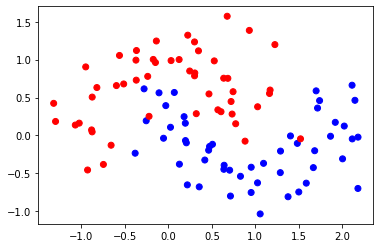

In [4]:
#creating scatter plot of moon dataset
colors=["red","blue"]
plt.scatter(features[:,0],features[:,1],color=[colors[idx] for idx in labels])

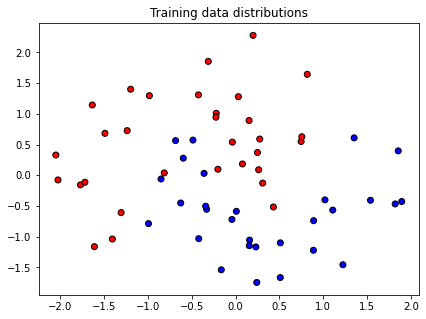

In [5]:
#creating train set and test set with 60% training and 40% test
h = .02 # step size in the mesh
X, y=features,labels
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)

#plotring of training data sets the dataset first
plt.subplots(figsize = (15,5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
ax.set_title("Training data distributions")

#plotting the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')

#plotting the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4,edgecolors='k')

In [6]:
#creating model and training it with train data set
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=12, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [7]:
#printing neuron weights
print(clf.coefs_)

#printing bias weights
print(clf.intercepts_)

[array([[ -16.52832546,   97.58713697,  -33.82013418],
       [  18.53235838, -141.28012693,   96.88777969]]), array([[-26.22994507],
       [ 26.32479963],
       [-21.11590511]])]
[array([ 24.4553961 , 152.23616377,  69.65049462]), array([20.7423068])]


In [8]:
#defining the function to calculate the slope intercept
def findSlopeIntercept(coefs,bias):
  hidden_wts=coefs[0]
  bias_wts=bias[0]
  num=len(hidden_wts[0])
  slopIntercept=[]
  for i in range(num):
    w=[bias_wts[i],hidden_wts[0,i],hidden_wts[1,i]]
    slope=w[1]/w[2]*(-1)
    intercept=w[0]/w[2]*(-1)
    slopIntercept.append([slope,intercept])
  return(slopIntercept)

In [9]:
#calculating the slope intercept
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept

[[0.8918630389379647, -1.3196051795785662],
 [0.690735060127299, 1.0775483224246747],
 [0.34906501402381457, -0.7188780137833691]]

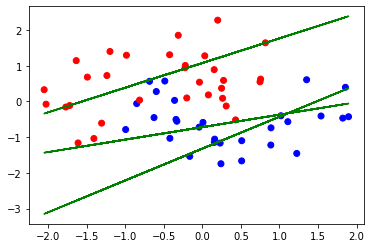

In [10]:
#Printing decision boundaries from nodes
colors=["red","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
  yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
  plt.plot(xvalues,yvalues,"g-")

Text(0.5, 1.0, 'Multi Layer Neural Network')

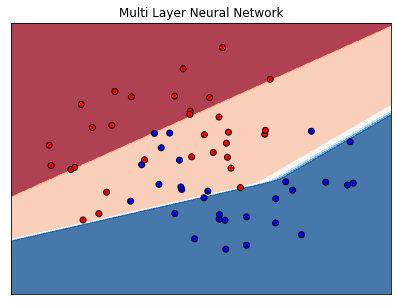

In [11]:
#plotting the different regions of decision boundaries
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#placing result in color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

#plotting training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')

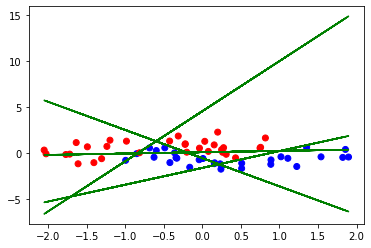

In [12]:
#training new classifier with one hidden layer and four nodes
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)

#calculating slope intercept
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)

#plotting graph
for i in range(num):
  yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
  plt.plot(xvalues,yvalues,"g-")

Text(0.5, 1.0, 'Multi Layer Neural Network')

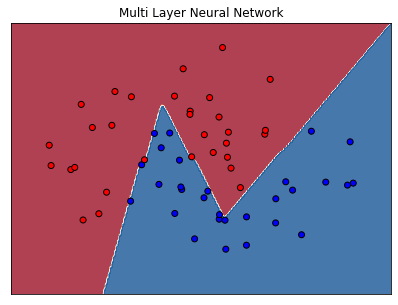

In [13]:
#plotting the decions boundaries and regions for new classifier
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#placing result in color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

#plotting training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')

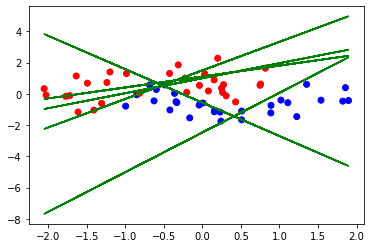

In [14]:
#training new classifier with one hidden layer and five nodes
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)

#calculating slope intercept
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)

#plotting graph
for i in range(num):
  yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
  plt.plot(xvalues,yvalues,"g-")

Text(0.5, 1.0, 'Multi Layer Neural Network')

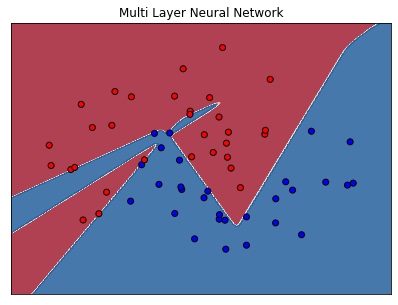

In [15]:
#plotting the decions boundaries and regions for new classifier
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#placing result in color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

#plotting training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')

By adding more nodes to the model, the decicion boundary formed by the number of nodes increases in complexity and shape as more neurons are added to the model. By adding more nodes, the decision boundary can be adjusted to better separate the different classes found in the attribute sample space. Neverthless, one of the biggest issue with adding more neurons to the model is that the model can overfit the dataset and therefore not fully serve its purpose
#Answer Question 11

In [34]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#creating numpy arrays to receive data
data=np.load("/content/drive/MyDrive/Neural Networks/Datasets/olivetti_faces.npy")
target=np.load("/content/drive/MyDrive/Neural Networks/Datasets/olivetti_faces_target.npy")

#printing numpy arrays
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


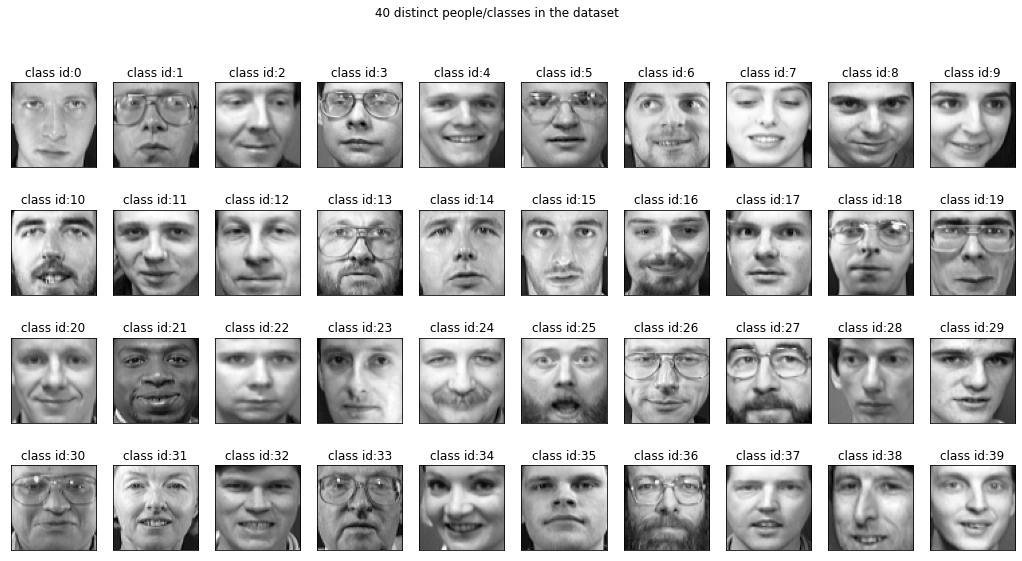

In [36]:
#defining function to randomly print faces
def show_a_random_face_per_class(images, unique_ids):

  #creating 4X10 subplots in 18x9 figure size
  fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))

  #flatting matrix to 40 array
  axarr=axarr.flatten()

  #repeating user ids
  rand=np.random.randint(10)
  for unique_id in unique_ids:
    image_index=unique_id*10+rand
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("class id:{}".format(unique_id))
  plt.suptitle("40 distinct people/classes in the dataset")

#displaying random faces per class
show_a_random_face_per_class(data, np.unique(target))

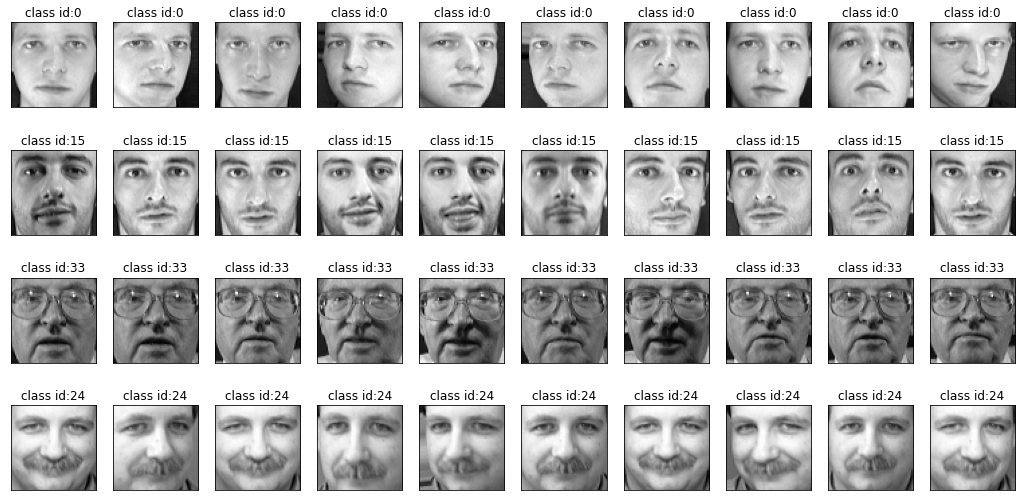

In [37]:
#defining function to diaplay all images from specific class
def show_all_faces_of_selected_subjects(images, subject_ids):

  #each subject contains 10 images
  cols=10
  rows=(len(subject_ids)*10)/cols #
  rows=int(rows)
  fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))  
  for i, subject_id in enumerate(subject_ids):
    for j in range(cols):
      image_index=subject_id*10 + j
      axarr[i,j].imshow(images[image_index], cmap="gray")
      axarr[i,j].set_xticks([])
      axarr[i,j].set_yticks([])
      axarr[i,j].set_title("class id:{}".format(subject_id))

#showing all faces from specific classes
show_all_faces_of_selected_subjects(images=data, subject_ids=[0,15, 33, 24])

In [38]:
#reshapping and preparing data
X = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape

(400, 4096)

In [39]:
#splitting data set into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.4, stratify=target, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 4096)
(240,)
(160, 4096)
(160,)


In [40]:
#training classifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=10,random_state=42,activation='logistic',max_iter=1000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [41]:
#testing the recently trained model and printing results to screen
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)

[19 19 17  2 27 14 13  9 37 21 35 39 39 13 35  3 31 19 20 16 29  9 13 30
 20 11 34  5 15 25 14 23 22 18  2 38 35 24  2 30  5 12 12  7 33 15  4 16
  4 11  0  7 39 34  0 26 30 38 22 26  1 13 24 36 17 27 14 10 28 39 38 32
 15  8 11 25 28 20 10  4  6 10 18  9  0 35 34 18  8 16 16 12 28 18  7 25
  7 37 31 21 29  6 21  9  3  0 33 26  6 27 17 23 33 24 38 32 12 37 15  1
  1 34 31 14  8 33 31  1 10 22 17 19 30 36 29  5 23  8  5 36 32  6  3 29
 20 24 32 22 26  4 36 25 27 37 28 11 21  3 23  2]
[ 5  5  5 13 31 13 31 38 13 31 23  5  1 13  6  6 31  5 13  6  5 13 31 38
  5  6 13  5 31 31 13  5 31 31  5 13  5 13  5 13  5 13 24 38 13  5  5  6
  5 31  5 13  5  5  5 31  5 13 31 31 13 31 13 31  5 10 13 31  5  5  5  5
  5  5 31 31 13  5 31  5  6 31 31  5 13  5 13 31 23 31  6  5  5 31  5 31
 13 13 31 13  5  6 38 13 31  6 13 31  6 31  5  6 13 13 13  5  5  5  5 13
 13  5 31 30  5 13 31 13 31 31  5 39 13 13 13  5  5  6  5 31  5  6  5  5
  5 13  5 31 31  5 31 13 31  5  5  6 13 13 13 13]


In [42]:
#printing confusion matrix and accuracy
cf=confusion_matrix(y_test, y_pred)
print(cf)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


0.08125

In [51]:
#cross validation 1 hidden layer awith 10 nodes
kf = KFold(n_splits=10)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10), random_state=1)

#fitting classifiation model
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train[train_indices], y_train[train_indices])
    print(clf.score(X_train[test_indices], y_train[test_indices]))

#testing classificaiton model and priting results
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)

#printitng confusion matrix
cf=confusion_matrix(y_test, y_pred)
print("The confusion matrix \n")
print(cf)

#printing accuracy
print("The accuracy score is ")
print(accuracy_score(y_test, y_pred))

0.09090909090909091
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.045454545454545456


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.045454545454545456


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0
0.047619047619047616
0.0
0.047619047619047616
[17 23 17 13 34 36 18 14 30 28 22  8 15 36 20 32 25  3 27  2 33 10 29 39]
[20 23 20 20 20 25 20 12 30 16 20 20 16 25 25 35 31 20 20 25 30 20 29 20]
The confusion matrix 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [46]:
#importing libraries
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#splitting test and train sets
Xtrain, Xtest, ytrain, ytest=train_test_split(X, target, test_size=.4,stratify=target, random_state=1)

#flastting data
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))

#setting kfold split value
kf = KFold(n_splits=10)
kf.get_n_splits(X)

#list declaration 
Acc1,Acc2,Acc3,Acc4 = [],[],[],[]

#loop that iterates to train and test different neural network models
for train_index, test_index in kf.split(X_train):
    X_train, X_test = Xtrain[train_index], Xtrain[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]

    #10 hidden nodes
    clf1=MLPClassifier(solver='lbfgs', hidden_layer_sizes=10,random_state=42,activation='logistic',max_iter=1000)
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    Acc1.append(accuracy_score(y_test, y_pred))
    print(Acc1)

    #50 hidden nodes
    clf2=MLPClassifier(solver='lbfgs', hidden_layer_sizes=50,random_state=42,activation='logistic',max_iter=1000)
    clf2.fit(X_train, y_train)
    y_pred = clf2.predict(X_test)
    Acc2.append(accuracy_score(y_test, y_pred))
    print(Acc2)

    #500 hidden nodes
    clf3=MLPClassifier(solver='lbfgs', hidden_layer_sizes=500,random_state=42,activation='logistic',max_iter=1000)
    clf3.fit(X_train, y_train)
    y_pred = clf3.predict(X_test)
    Acc3.append(accuracy_score(y_test, y_pred))
    print(Acc3)

    #50 hidden nodes layer 1, 10 hidden nodes layer 2
    clf4=MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,10),random_state=42,activation='logistic',max_iter=1000)
    clf4.fit(X_train, y_train)
    y_pred = clf4.predict(X_test)
    Acc4.append(accuracy_score(y_test, y_pred))
    print(Acc4)

#printing accuracy of models
print("1 layer: 10 nodes")
print(Acc1)
print(np.mean(Acc1))
print("1 layer: 50 nodes")
print(Acc2)
print(np.mean(Acc2))
print("1 layer: 500 nodes")
print(Acc3)
print(np.mean(Acc3))
print("2 layers, layer 1:50 nodes, layer2: 10 nodes")
print(Acc4)
print(np.mean(Acc4))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125]
[0.625]
[0.7083333333333334]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25]
[0.625, 0.4166666666666667]
[0.7083333333333334, 0.6666666666666666]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25]
[0.125, 0.25, 0.0]
[0.625, 0.4166666666666667, 0.75]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25, 0.0, 0.041666666666666664]
[0.625, 0.4166666666666667, 0.75, 0.5]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333, 0.375]
[0.125, 0.25, 0.0, 0.041666666666666664, 0.0]
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333, 0.375, 0.16666666666666666]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25, 0.0, 0.041666666666666664, 0.0, 0.0]
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.5833333333333334]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334, 0.9583333333333334]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333, 0.375, 0.16666666666666666, 0.375]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25, 0.0, 0.041666666666666664, 0.0, 0.0, 0.25]
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334, 0.9583333333333334, 0.8333333333333334]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333, 0.375, 0.16666666666666666, 0.375, 0.3333333333333333]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25, 0.0, 0.041666666666666664, 0.0, 0.0, 0.25, 0.0]
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.5]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334, 0.9583333333333334, 0.8333333333333334, 0.6666666666666666]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333, 0.375, 0.16666666666666666, 0.375, 0.3333333333333333, 0.375]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25, 0.0, 0.041666666666666664, 0.0, 0.0, 0.25, 0.0, 0.0]
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.5, 0.5416666666666666]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334, 0.9583333333333334, 0.8333333333333334, 0.6666666666666666, 0.7916666666666666]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.375, 0.25, 0.3333333333333333, 0.375, 0.16666666666666666, 0.375, 0.3333333333333333, 0.375, 0.375]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.125, 0.25, 0.0, 0.041666666666666664, 0.0, 0.0, 0.25, 0.0, 0.0, 0.125]
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.5, 0.5416666666666666, 0.5833333333333334]
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334, 0.9583333333333334, 0.8333333333333334, 0.6666666666666666, 0.7916666666666666, 0.875]
[0.375, 0.25, 0.3333333333333333, 0.375, 0.16666666666666666, 0.375, 0.3333333333333333, 0.375, 0.375, 0.16666666666666666]
1 layer: 10 nodes
[0.125, 0.25, 0.0, 0.041666666666666664, 0.0, 0.0, 0.25, 0.0, 0.0, 0.125]
0.07916666666666668
1 layer: 50 nodes
[0.625, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.5, 0.5416666666666666, 0.5833333333333334]
0.55
1 layer: 500 nodes
[0.7083333333333334, 0.6666666666666666, 0.9583333333333334, 0.75, 0.8333333333333334, 0.9583333333333334, 0.8333333333333334, 0.6666666666666666, 0.7916666666666666, 0.875]
0.8041666666

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


As per the results it can be noted that the model which consisted of 1 hidden layer with 500 nodes performed better than the other neural network models. The accuracy for model with 10 neurons was 7%. The accuracy for model with 50 nodes was 55%. The accuracy for the model with 500 nodes was 80%. While the model with 2 hidden layers obtained an accuracy of 31% 